In [1]:
# imports
from commstools.core import Signal
from commstools.impairments import add_gaussian_noise
from commstools.logger import set_log_level
from commstools.plotting import filter_response, ideal_constellation

set_log_level("WARNING")


2026-02-07 17:38:28 [INFO] [commstools/backend.py] CuPy is available and functional, defaulting Signals to GPU.


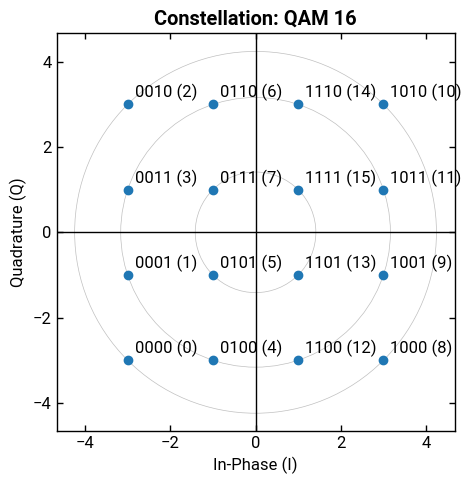

In [2]:
ideal_constellation(modulation="qam", order=16, show=True)


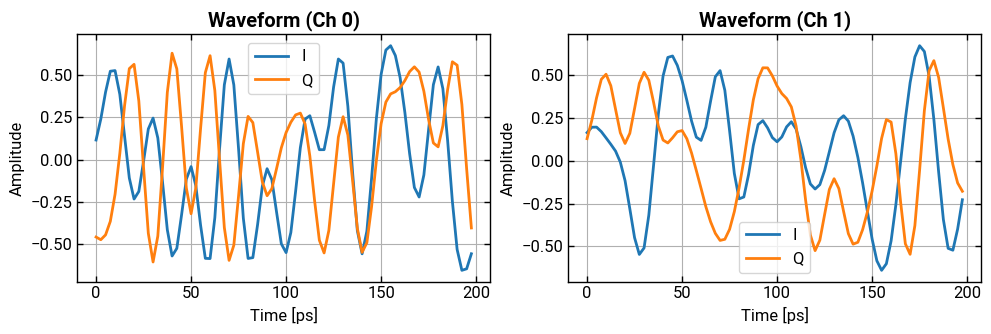

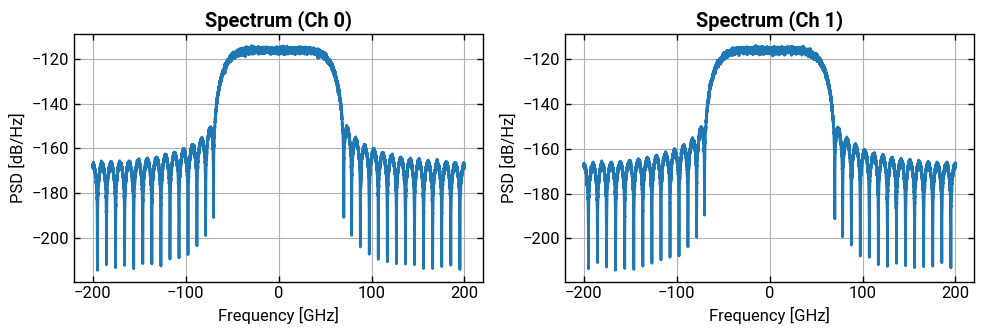

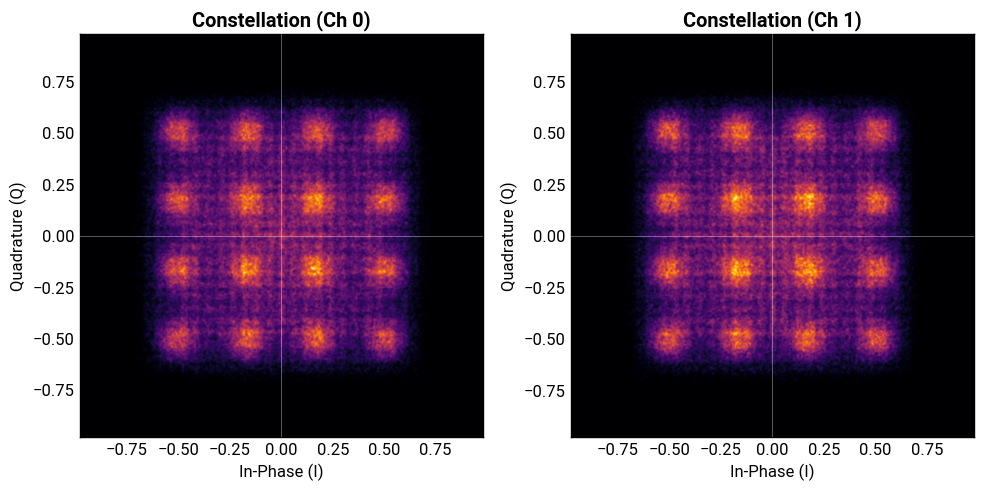

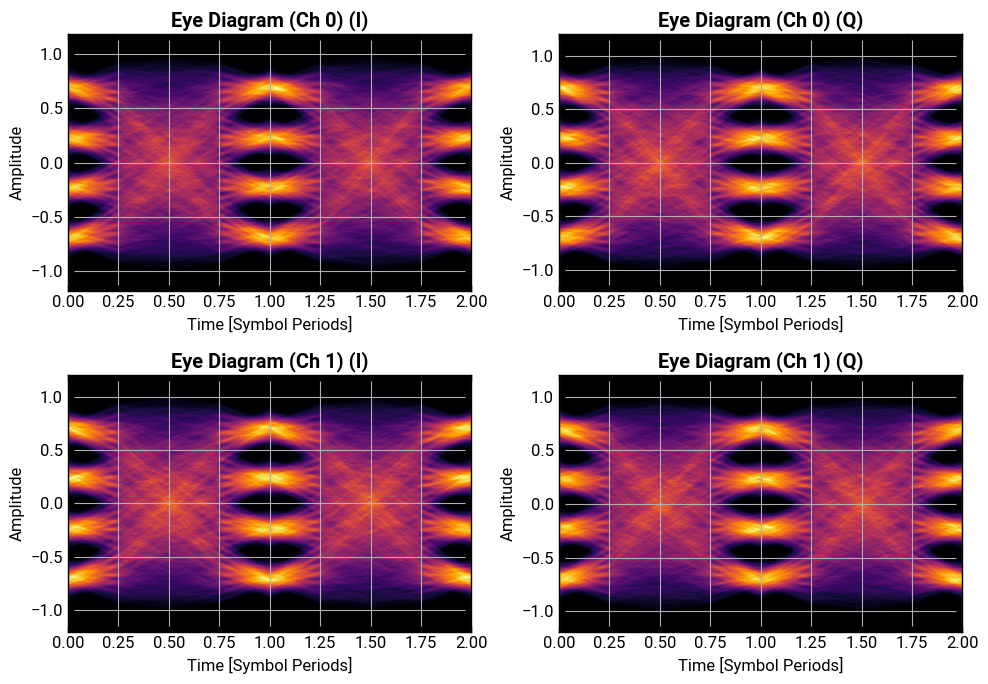

In [62]:
symbol_rate = 100e9
sampling_rate = 400e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = Signal.qam(
    order=16,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=43,
    num_streams=2,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)
sig_4qam.plot_psd(show=True, nperseg=2**14)
sig_4qam.plot_constellation(show=True, overlay_ideal=False, bins=512)
sig_4qam.plot_eye(show=True)


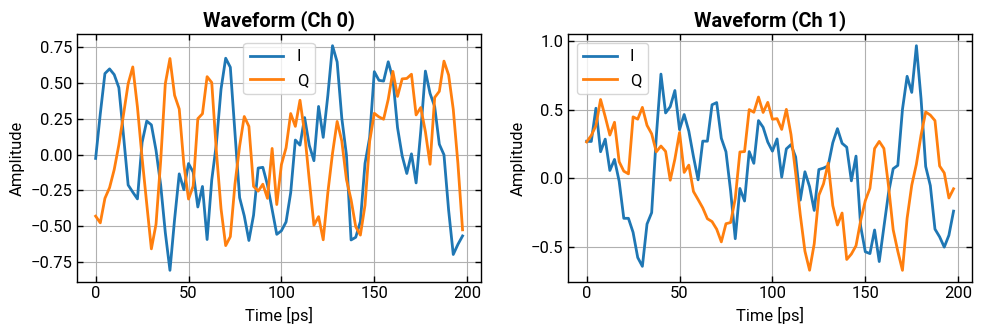

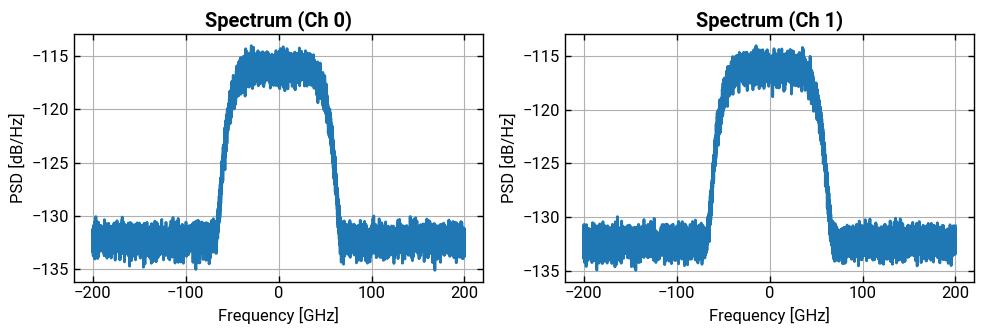

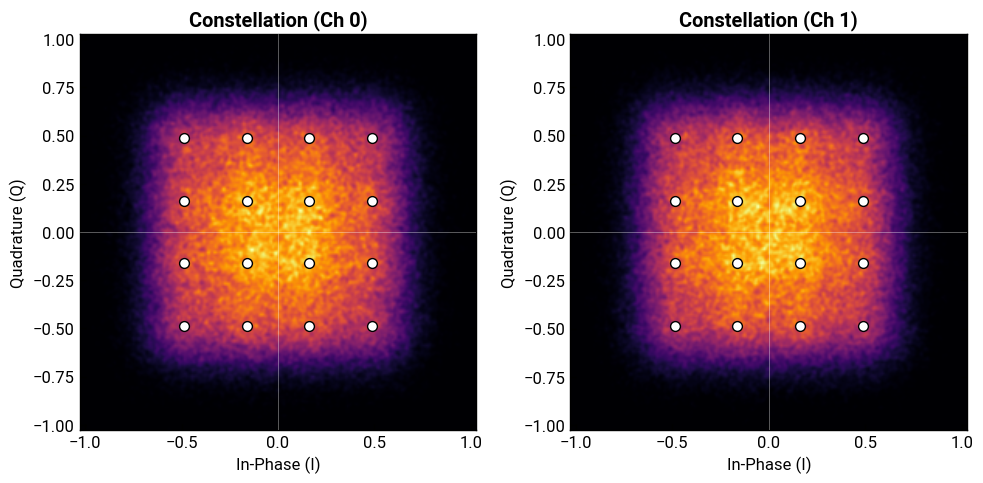

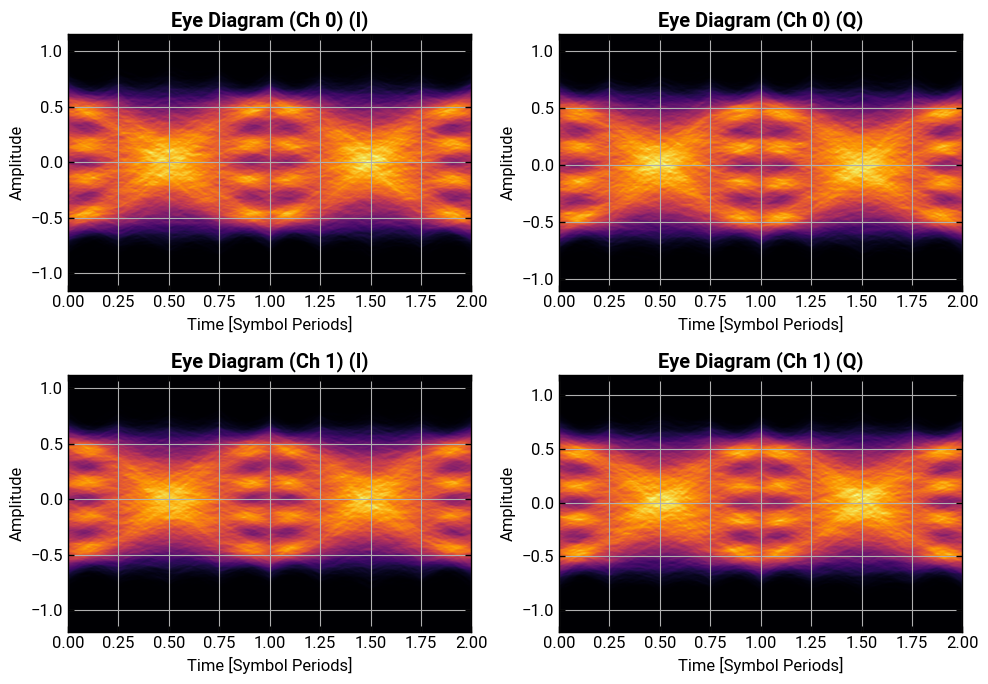

In [88]:
sig_4qam_n = add_gaussian_noise(sig_4qam, snr_db=10)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(show=True, overlay_ideal=True, bins=256)
sig_4qam_n.plot_eye(show=True)


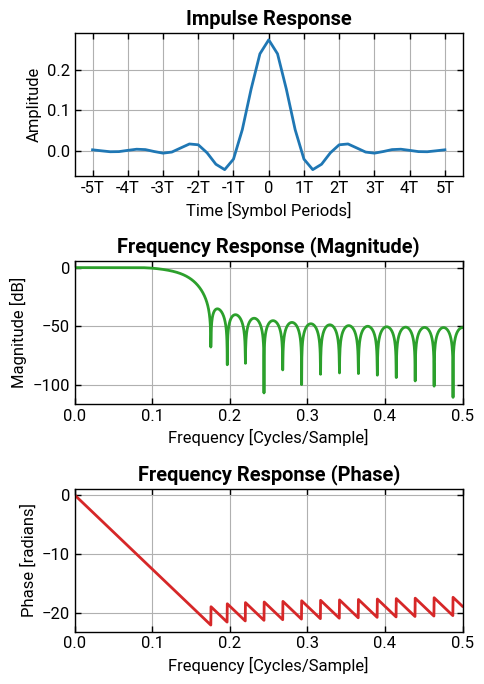

In [76]:
rrc_filter = sig_4qam_n.shaping_filter_taps()
filter_response(rrc_filter, sps=sps, show=True)


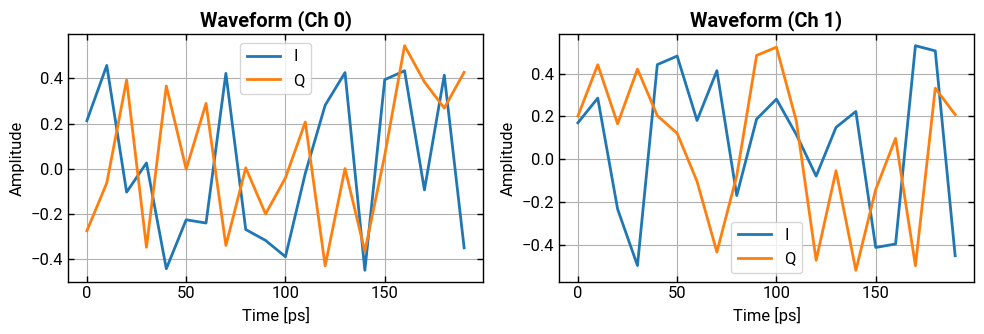

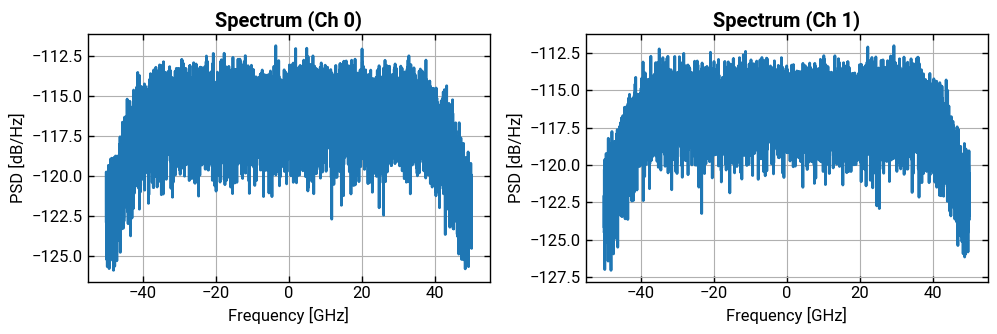

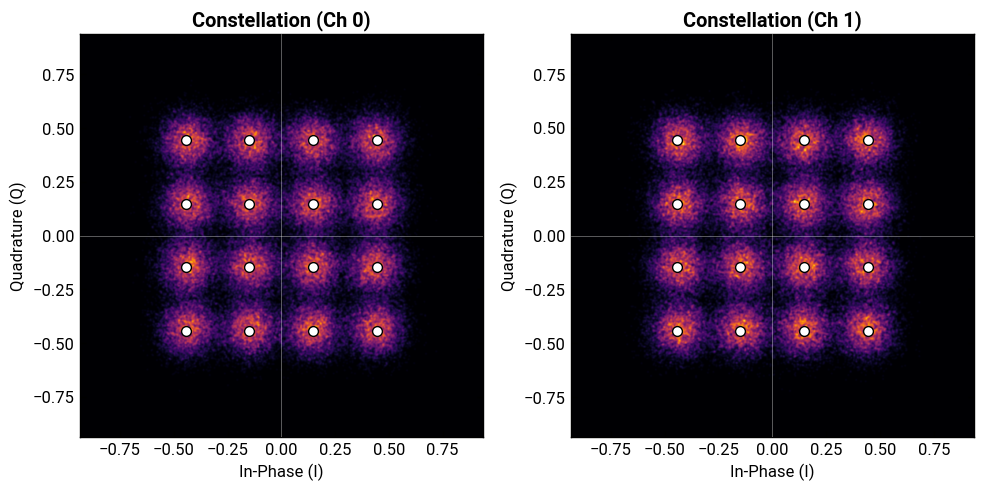

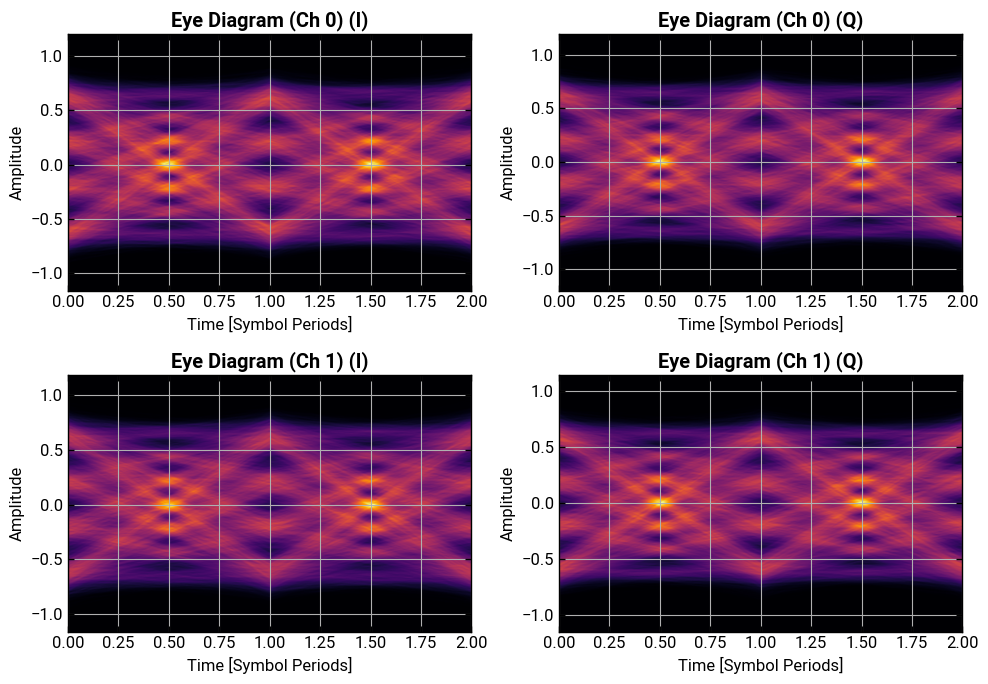

In [ ]:
sig_4qam_n.matched_filter()
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(show=True, overlay_ideal=True, bins=512)
sig_4qam_n.plot_eye(show=True)


In [78]:
sig_4qam.print_info()


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation Scheme,QAM
3,Modulation Order,16
4,Symbol Rate,100.00 GBaud
5,Bit Rate,400.00 Gbps
6,Sampling Rate,400.00 GHz
7,Samples Per Symbol,4.00
8,Pulse Shape,RRC
9,Duration,1.00 µs


In [79]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.spectral_domain = "PASSBAND"
sig_tmp.physical_domain = "OPT"
sig_tmp.center_frequency = 193.4144e12


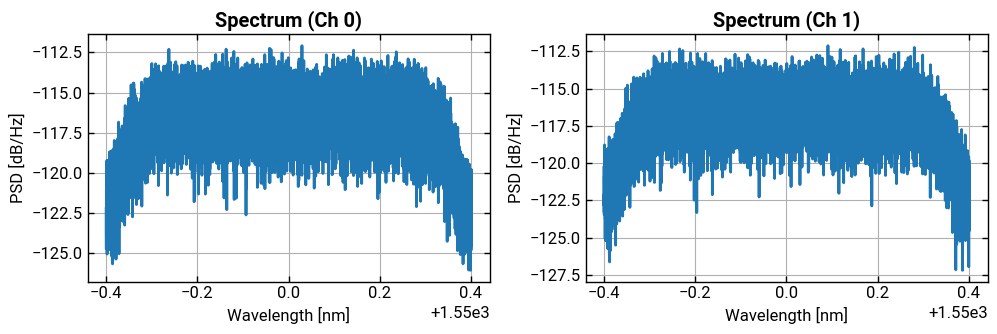

,Property,Value
0,Spectral Domain,PASSBAND
1,Physical Domain,OPT
2,Modulation Scheme,QAM
3,Modulation Order,16
4,Symbol Rate,100.00 GBaud
5,Bit Rate,400.00 Gbps
6,Sampling Rate,100.00 GHz
7,Samples Per Symbol,1.00
8,Pulse Shape,RRC
9,Duration,1.00 µs


In [80]:
sig_tmp.plot_psd(show=True, x_axis="wavelength", nperseg=2**14)
sig_tmp.print_info()


In [81]:
sig_4qam_n.shift_frequency(30000e6)


Signal(samples=array([[ 0.20740094-0.22213193j, -0.0912382 +0.56537717j,
         0.24894159-0.25204657j, ...,  0.1563447 -0.42018701j,
        -0.08500545+0.18770886j,  0.55203282-0.2468376j ],
       [ 0.08137115+0.14155947j, -0.48511041+0.06515711j,
         0.21701913-0.06681911j, ...,  0.2799842 +0.44087078j,
        -0.03642638-0.1959163j , -0.21678815+0.57385539j]],
      shape=(2, 100000)), sampling_rate=100000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_symbols=array([[ 1.-3.j,  3.-1.j, -1.+3.j, ..., -1.-3.j,  1.-1.j,  1.+3.j],
       [ 1.+1.j,  1.+3.j, -1.+1.j, ...,  3.+1.j, -1.+1.j, -3.-3.j]],
      shape=(2, 100000), dtype=complex64), pulse_shape='rrc', spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=30000000000.0, filter_span=10, rrc_rolloff=0.35, rc_rolloff=0.35, gaussian_bt=0.3, smoothrect_bt=1.0)

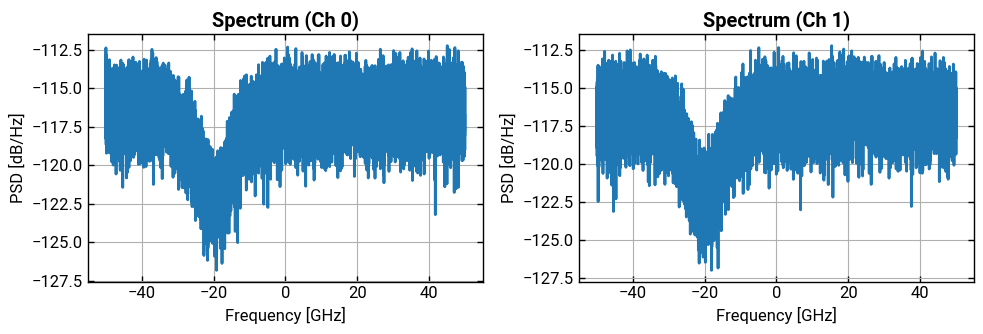

In [82]:
sig_4qam_n.plot_psd(show=True, nperseg=2**14)


In [83]:
sig_4qam_n.print_info()


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation Scheme,QAM
3,Modulation Order,16
4,Symbol Rate,100.00 GBaud
5,Bit Rate,400.00 Gbps
6,Sampling Rate,100.00 GHz
7,Samples Per Symbol,1.00
8,Pulse Shape,RRC
9,Duration,1.00 µs
